In [161]:
import pennylane as qml
from gate_opt_utils_18 import *
import matplotlib.pyplot as plt
from penny_to_graph_31 import Penny_to_Graph
from graph_utils_1 import *
from quantum_circuit_optimization import *

In [2]:
[ds] = qml.data.load("ketgpt")

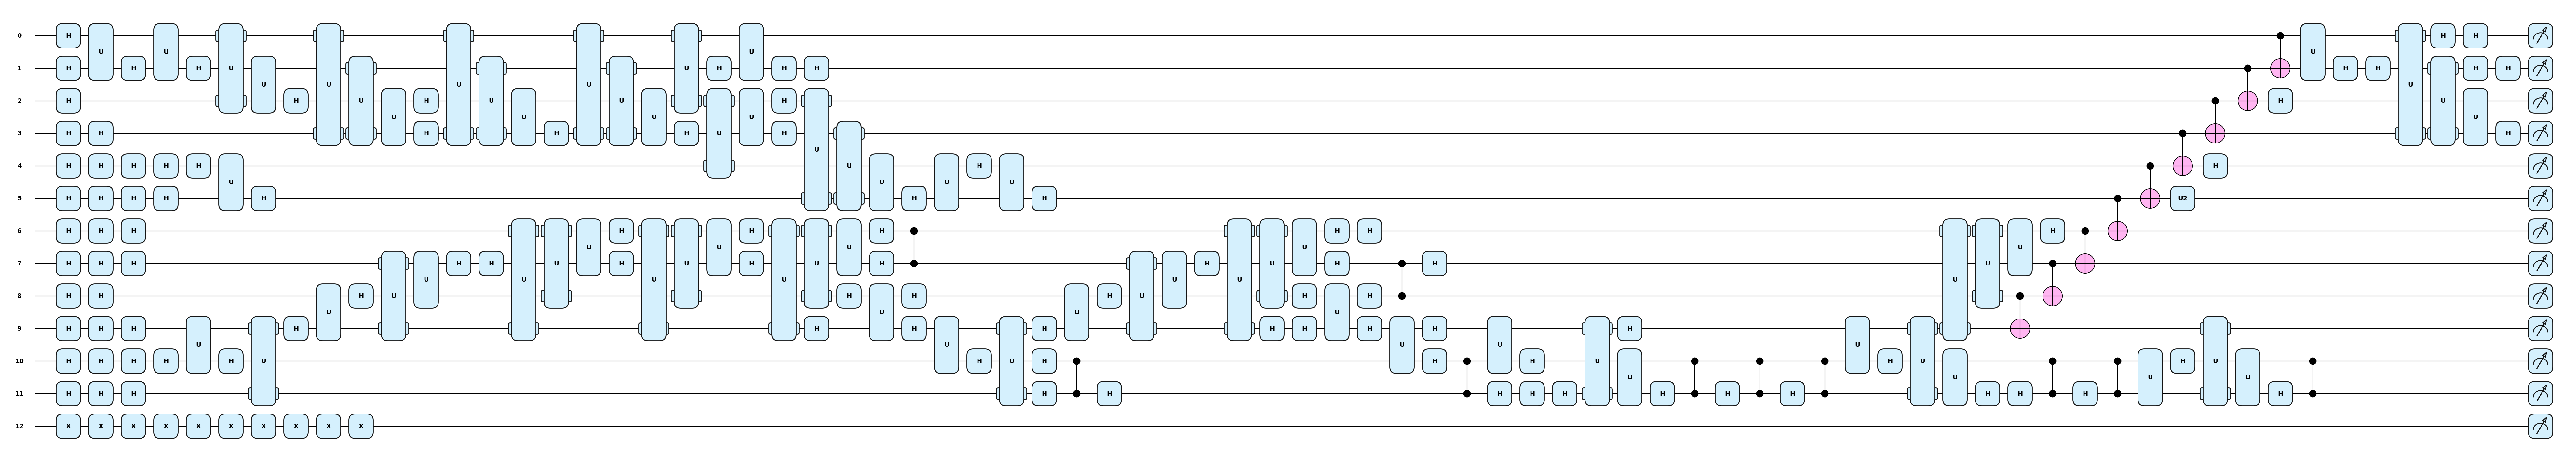

               0
num_qubit     13
num_gate     199
num_1q_gate  116
num_2q_gate   19
unitary       64
depth         66
None


In [16]:
seed = 0

@qml.qnode(qml.device('default.qubit'))
def circuit(): # 0 to 99
    for op in ds.circuits[seed]:
        qml.apply(op)
    return qml.state()

fig, axs = qml.draw_mpl(circuit, style='pennylane')()
plt.show()

print(summary_penny(circuit))

               0
num_qubit     12
num_gate     145
num_1q_gate   62
num_2q_gate   19
unitary       64
depth         67
None


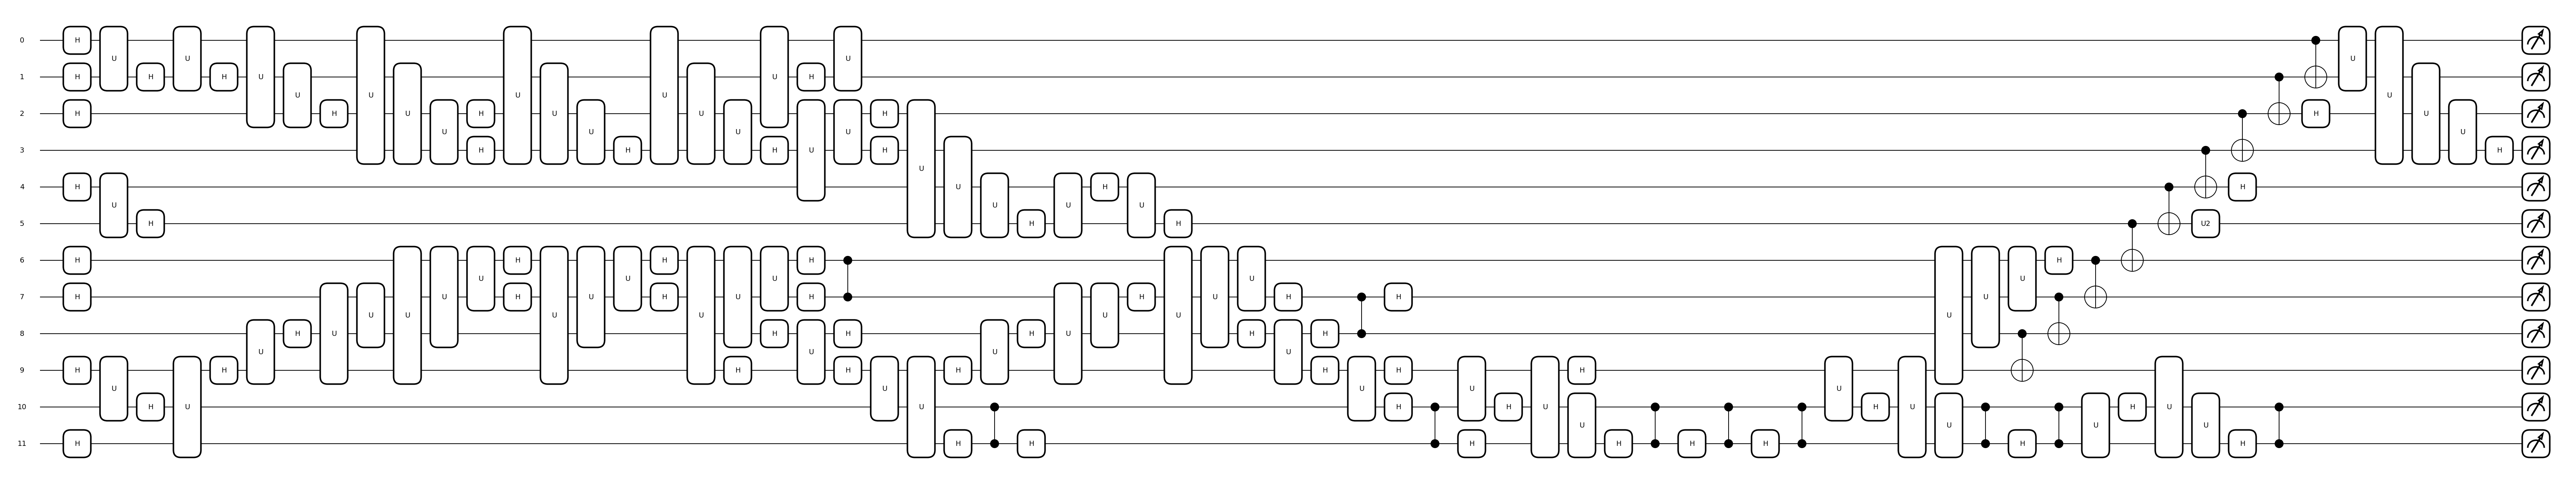

In [17]:
qnode = optimization_lev_1(ds, circuit, seed=0)

145 48


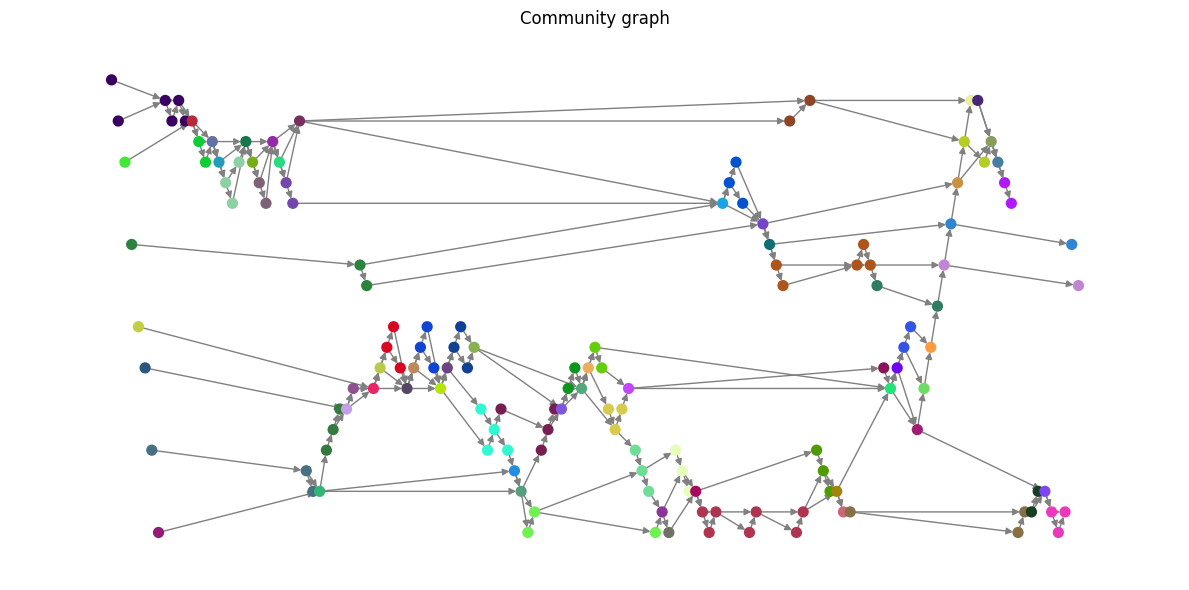

In [244]:
pg = Penny_to_Graph(qnode)
G = pg.G.copy()
G, communities = graph_alg_level_3(G)
community_graph(G, pg.pos, communities)

In [261]:
G.nodes()['Hadamard_0']

{'type': 'gate',
 'label': 'Hadamard',
 'params': [],
 'wires': [0],
 'num_q': 1,
 'community': 0}

In [ ]:
pg = Penny_to_Graph(qnode)
G = pg.G.copy()

communities = get_communities(G)
communities

In [248]:
num_community = len(communities)
circuit_info = extract_info_from_qnode(qnode)

subcircuit_idx_arr = []
for i in range(num_community):
    temp_gate = [n for n in G.nodes if G.nodes[n].get('community') == i]
    temp_gate = [item for item in temp_gate if item]
    temp_com_label = [int(g.split('_')[1]) for g in temp_gate]
    subcircuit_idx_arr.append(temp_com_label)

# index to circuit_info
community_circuit_info = []
for idx_list in subcircuit_idx_arr:
    target = [circuit_info[j] for j in idx_list]
    if target == []:
        continue
    community_circuit_info.append(target)

community_circuit_info

[[{'name': 'Hadamard', 'wires': [0], 'params': []},
  {'name': 'Hadamard', 'wires': [1], 'params': []},
  {'name': 'QubitUnitary',
   'wires': [0, 1],
   'params': [[[(1+0j), 0j, 0j, 0j],
     [0j, (1+0j), 0j, 0j],
     [0j, 0j, (1+0j), 0j],
     [0j, 0j, 0j, (6.123233995736766e-17-1j)]]]},
  {'name': 'Hadamard', 'wires': [1], 'params': []},
  {'name': 'QubitUnitary',
   'wires': [0, 1],
   'params': [[[(1+0j), 0j, 0j, 0j],
     [0j, (1+0j), 0j, 0j],
     [0j, 0j, (1+0j), 0j],
     [0j, 0j, 0j, (6.123233995736766e-17-1j)]]]},
  {'name': 'Hadamard', 'wires': [1], 'params': []}],
 [{'name': 'Hadamard', 'wires': [2], 'params': []}],
 [{'name': 'Hadamard', 'wires': [4], 'params': []},
  {'name': 'QubitUnitary',
   'wires': [4, 5],
   'params': [[[(1+0j), 0j, 0j, 0j],
     [0j, (1+0j), 0j, 0j],
     [0j, 0j, (1+0j), 0j],
     [0j, 0j, 0j, (6.123233995736766e-17-1j)]]]},
  {'name': 'Hadamard', 'wires': [5], 'params': []}],
 [{'name': 'Hadamard', 'wires': [6], 'params': []}],
 [{'name': 'Hada

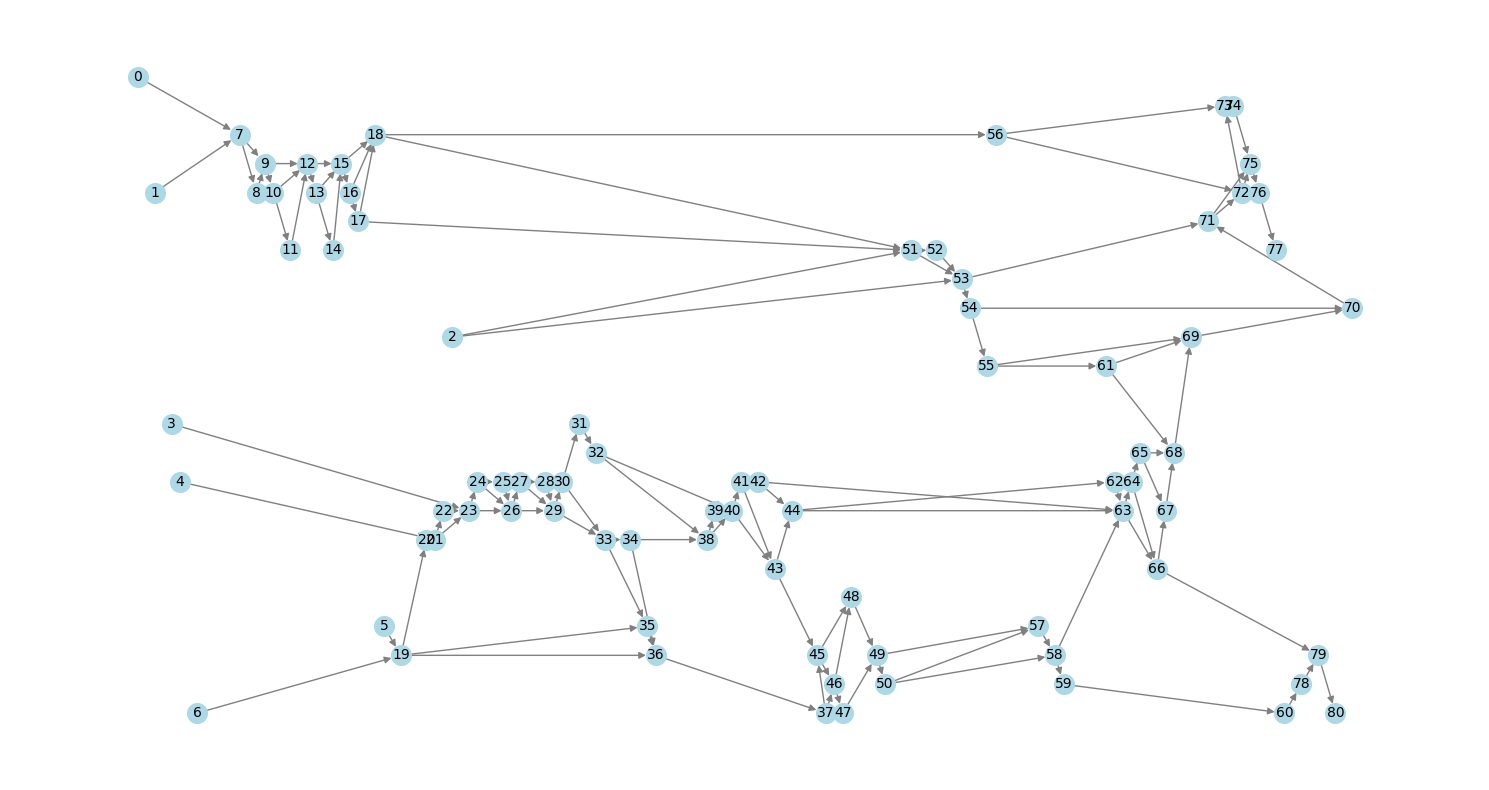

In [290]:
# how to get pos
from networkx.algorithms.summarization import snap_aggregation
H = snap_aggregation(G, node_attributes=['community'])

# change node names
mapping = {}
for node in H.nodes:
    if isinstance(node, str) and node.startswith("Supernode-"):
        new_name = node.replace("Supernode-", "")
        mapping[node] = new_name
H = nx.relabel_nodes(H, mapping)

# new position
start_node = []
for node, attr in H.nodes(data=True):
    start_node.append(str(next(iter(attr['group']))))

new_pos = {node: pg.pos[node] for node in start_node if node in pg.pos}
renamed_pos = {i: coord for i, (node, coord) in enumerate(new_pos.items())}

#########################################
from collections import defaultdict

# Step 1: Group nodes by community
groups = defaultdict(list)
for node, data in G.nodes(data=True):
    groups[data['community']].append(node)

H = nx.Graph()
for group, nodes in groups.items():
    H.add_node(group)
for u, v in G.edges():
    cu = G.nodes[u]['community']
    cv = G.nodes[v]['community']
    if cu != cv:
        H.add_edge(cu, cv)

# change node names
# H = nx.relabel_nodes(H, lambda x: str(x))

#########################################
# make it directional
H_directed = nx.MultiDiGraph()
for u, v in H.edges():
    if u < v:
        H_directed.add_edge(u, v)
    else:
        H_directed.add_edge(v, u)

# missing edge
H_directed.add_edge(68,69)

fig, ax = plt.subplots(figsize=(15, 8))
nx.draw(H_directed, renamed_pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, edge_color='gray', ax=ax)
plt.tight_layout()
plt.show()

In [300]:
groups[0]

['Hadamard_0',
 'Hadamard_1',
 'QubitUnitary_8',
 'Hadamard_9',
 'QubitUnitary_10',
 'Hadamard_11']

Renamed community nodes: ['QubitUnitary', 'Hadamard_2', 'Hadamard_4', 'Hadamard_5', 'Hadamard_7', 'QubitUnitary_12', 'QubitUnitary_15', 'QubitUnitary_16', 'QubitUnitary_20', 'QubitUnitary_21', 'QubitUnitary_24', 'QubitUnitary_25', 'QubitUnitary_28', 'QubitUnitary_31', 'QubitUnitary_35', 'QubitUnitary_36', 'QubitUnitary_39', 'QubitUnitary_40', 'QubitUnitary_44', 'QubitUnitary_45', 'QubitUnitary_49', 'QubitUnitary_50', 'CZ_54', 'QubitUnitary_60', 'QubitUnitary_61', 'QubitUnitary_67', 'QubitUnitary_70', 'QubitUnitary_71', 'CZ_77', 'CZ_82', 'Hadamard_83', 'QubitUnitary_87', 'QubitUnitary_91', 'QubitUnitary_97', 'QubitUnitary_98', 'QubitUnitary_108', 'QubitUnitary_109', 'Hadamard_115', 'QubitUnitary_116', 'QubitUnitary_117', 'CNOT_120', 'CNOT_121', 'CNOT_122', 'CNOT_126', 'CNOT_128', 'QubitUnitary_129', 'QubitUnitary_131', 'QubitUnitary_132', 'QubitUnitary_139']


NetworkXError: Node 'QubitUnitary' has no position.

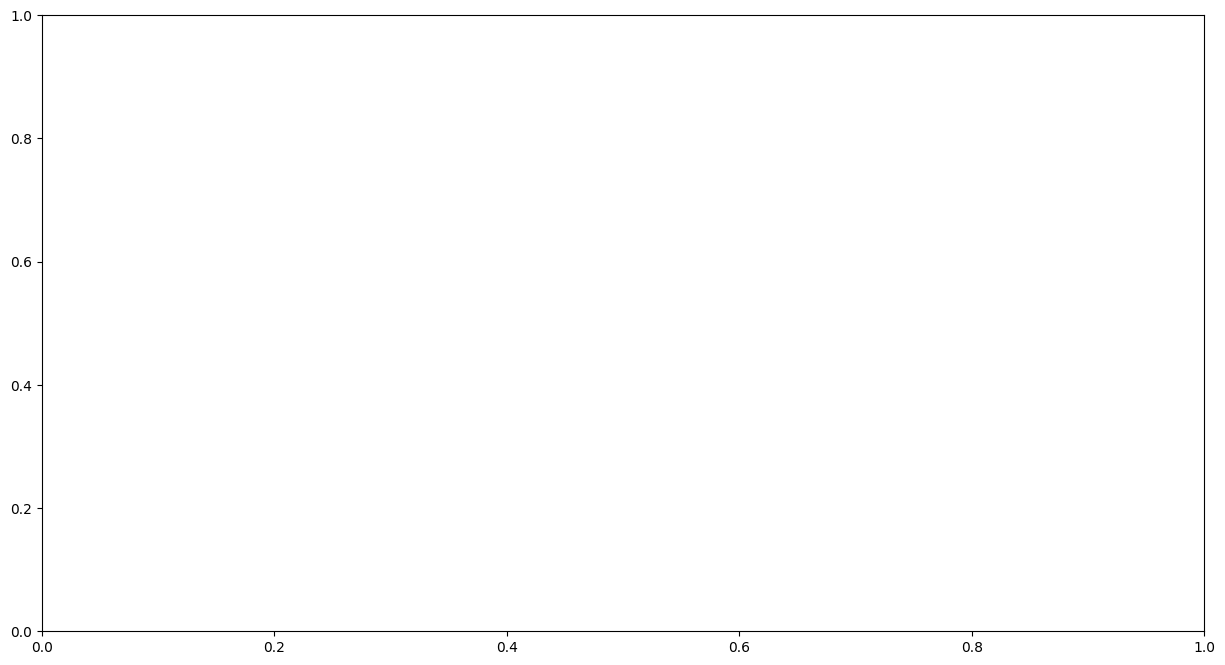

In [ ]:
# Example: group nodes by community
groups = defaultdict(list)
for node, data in G.nodes(data=True):
    groups[data['community']].append(node)

# Build your community graph (e.g., H_directed)
H_directed = nx.DiGraph()
H_directed.add_nodes_from(groups.keys())

# Add edges between communities (preserving direction, skipping self-loops)
for u, v, key in G.edges(keys=True):
    cu = G.nodes[u]['community']
    cv = G.nodes[v]['community']
    if cu != cv:
        H_directed.add_edge(cu, cv)

# Create renaming map
rename_map = {}
for community, members in groups.items():
    if len(members) > 1:
        rename_map[community] = 'QubitUnitary'
    else:
        rename_map[community] = str(members[0])  # or use a label if preferred

# Apply renaming
H_renamed = nx.relabel_nodes(H_directed, rename_map)

# Done! You can now use H_renamed
print("Renamed community nodes:", H_renamed.nodes)

# missing edge
H_renamed.add_edge(68,69)

fig, ax = plt.subplots(figsize=(15, 8))
nx.draw(H_renamed, renamed_pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, edge_color='gray', ax=ax)
plt.tight_layout()
plt.show()

In [305]:
graph_info(H_renamed)

QubitUnitary {}
Hadamard_2 {}
Hadamard_4 {}
Hadamard_5 {}
Hadamard_7 {}
QubitUnitary_12 {}
QubitUnitary_15 {}
QubitUnitary_16 {}
QubitUnitary_20 {}
QubitUnitary_21 {}
QubitUnitary_24 {}
QubitUnitary_25 {}
QubitUnitary_28 {}
QubitUnitary_31 {}
QubitUnitary_35 {}
QubitUnitary_36 {}
QubitUnitary_39 {}
QubitUnitary_40 {}
QubitUnitary_44 {}
QubitUnitary_45 {}
QubitUnitary_49 {}
QubitUnitary_50 {}
CZ_54 {}
QubitUnitary_60 {}
QubitUnitary_61 {}
QubitUnitary_67 {}
QubitUnitary_70 {}
QubitUnitary_71 {}
CZ_77 {}
CZ_82 {}
Hadamard_83 {}
QubitUnitary_87 {}
QubitUnitary_91 {}
QubitUnitary_97 {}
QubitUnitary_98 {}
QubitUnitary_108 {}
QubitUnitary_109 {}
Hadamard_115 {}
QubitUnitary_116 {}
QubitUnitary_117 {}
CNOT_120 {}
CNOT_121 {}
CNOT_122 {}
CNOT_126 {}
CNOT_128 {}
QubitUnitary_129 {}
QubitUnitary_131 {}
QubitUnitary_132 {}
QubitUnitary_139 {}
68 {}
69 {}


In [291]:
circuit_info

[{'name': 'Hadamard', 'wires': [0], 'params': []},
 {'name': 'Hadamard', 'wires': [1], 'params': []},
 {'name': 'Hadamard', 'wires': [2], 'params': []},
 {'name': 'Hadamard', 'wires': [4], 'params': []},
 {'name': 'Hadamard', 'wires': [6], 'params': []},
 {'name': 'Hadamard', 'wires': [7], 'params': []},
 {'name': 'Hadamard', 'wires': [9], 'params': []},
 {'name': 'Hadamard', 'wires': [11], 'params': []},
 {'name': 'QubitUnitary',
  'wires': [0, 1],
  'params': [[[(1+0j), 0j, 0j, 0j],
    [0j, (1+0j), 0j, 0j],
    [0j, 0j, (1+0j), 0j],
    [0j, 0j, 0j, (6.123233995736766e-17-1j)]]]},
 {'name': 'Hadamard', 'wires': [1], 'params': []},
 {'name': 'QubitUnitary',
  'wires': [0, 1],
  'params': [[[(1+0j), 0j, 0j, 0j],
    [0j, (1+0j), 0j, 0j],
    [0j, 0j, (1+0j), 0j],
    [0j, 0j, 0j, (6.123233995736766e-17-1j)]]]},
 {'name': 'Hadamard', 'wires': [1], 'params': []},
 {'name': 'QubitUnitary',
  'wires': [0, 1, 2],
  'params': [[[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j],
    [0j, (1+0j), 0j, 0j, 

In [30]:
def info_to_qnode_matrix(circuit_info):
    with qml.tape.QuantumTape() as tape:
        for gate in circuit_info:
            name = gate['name']
            wires = gate['wires']
            params = gate['params']
            if name == 'Hadamard':
                qml.Hadamard(wires=wires[0])
            elif name == 'PauliX':
                qml.PauliX(wires=wires[0])
            elif name == 'U2':
                qml.U2(params[0], params[1], wires=wires[0])
            elif name == 'CNOT':
                qml.CNOT(wires=wires)            
            elif name == 'CZ':
                qml.CZ(wires=wires)
            elif name == 'QubitUnitary':
                matrix = np.array(params[0])
                qml.QubitUnitary(matrix, wires=wires)
            else:
                raise ValueError(f"Unsupported gate: {name}")
    wires = wire_range_2(circuit_info)
    return qml.matrix(tape, wire_order=wires), wires

In [306]:
for idx, ci in enumerate(community_circuit_info):
    if len(ci) > 1:
        matrix, wries = info_to_qnode_matrix(ci)
        community_circuit_info[idx] =  [{'name': 'QubitUnitary', 'wires': wries, 'params':[matrix]}] # replaced

community_circuit_info = np.array(community_circuit_info).flatten()
community_circuit_info

array([{'name': 'QubitUnitary', 'wires': [0, 1], 'params': [array([[ 5.00000000e-01+0.00000000e+00j,  5.00000000e-01+0.00000000e+00j,
                5.00000000e-01+0.00000000e+00j,  5.00000000e-01+0.00000000e+00j],
              [ 5.00000000e-01+0.00000000e+00j, -5.00000000e-01+0.00000000e+00j,
                5.00000000e-01+0.00000000e+00j, -5.00000000e-01+0.00000000e+00j],
              [ 5.00000000e-01-5.00000000e-01j,  3.11164266e-19+3.11164266e-19j,
               -5.00000000e-01+5.00000000e-01j, -3.11164266e-19-3.11164266e-19j],
              [ 3.11164266e-19-3.11164266e-19j,  5.00000000e-01+5.00000000e-01j,
               -3.11164266e-19+3.11164266e-19j, -5.00000000e-01-5.00000000e-01j]])]}                                                 ,
       {'name': 'Hadamard', 'wires': [2], 'params': []},
       {'name': 'QubitUnitary', 'wires': [4, 5], 'params': [array([[ 5.000000e-01+0.j ,  5.000000e-01+0.j ,  5.000000e-01+0.j ,
                5.000000e-01+0.j ],
              [ 5.000

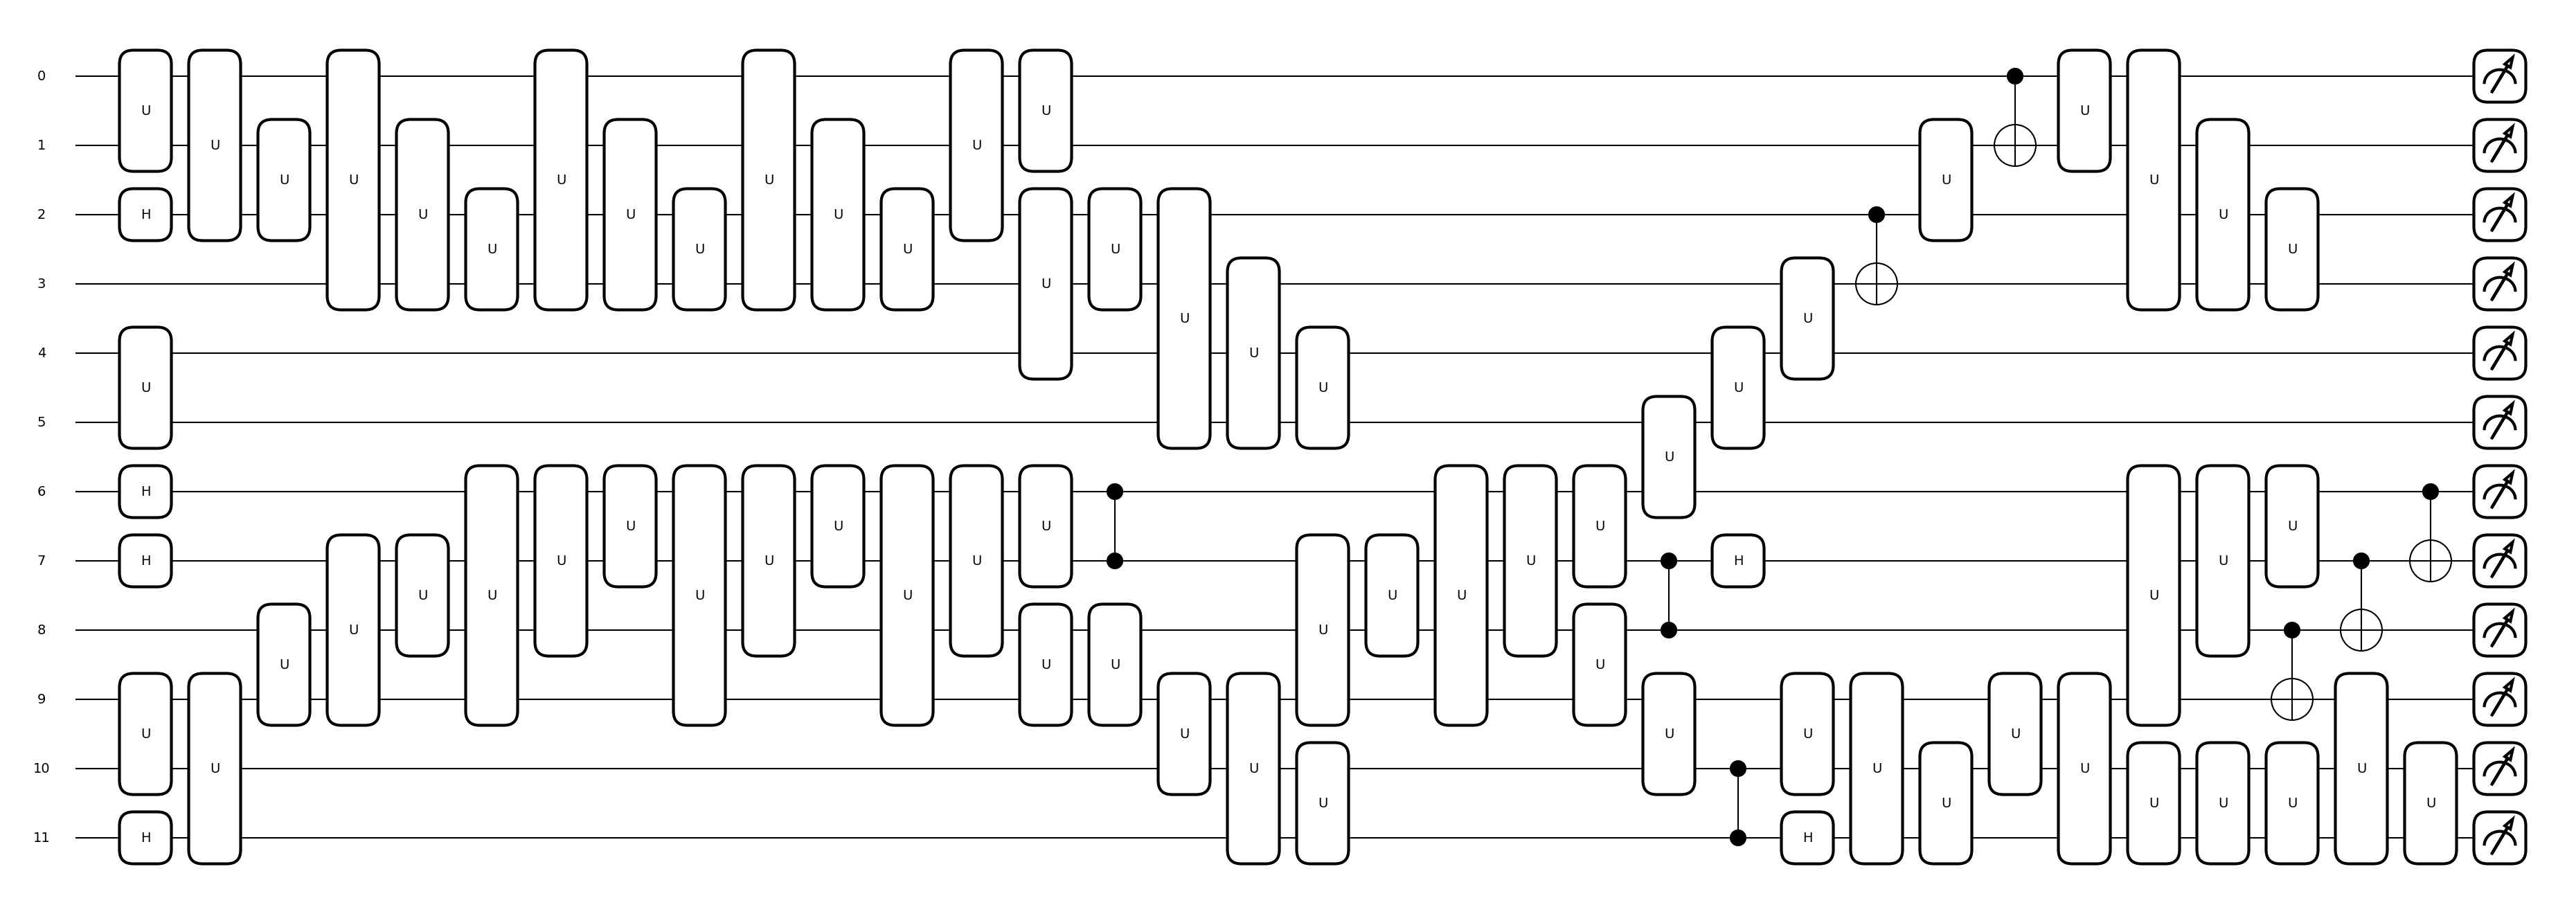

In [41]:
com_qnode = info_to_qnode(community_circuit_info)
qml.draw_mpl(com_qnode)()
plt.show()